# Análisis de Valoración de Ally Financial (ALLY)

Este notebook ofrece un análisis de valoración integral de Ally Financial utilizando múltiples métodos:

1. **Valor Contable** - Valoración básica del patrimonio
2. **Valor Contable Ajustado** - Patrimonio menos intangibles
3. **Ratio P/E** - Valoración basada en ganancias
4. **Modelo de Descuento de Dividendos (DDM)** - Valor presente de dividendos futuros
5. **Compañías Comparables** - Análisis por múltiplos de pares
6. **DCF (Flujo de Caja Libre)** - Valoración por flujo de caja descontado
7. **Red Neuronal LSTM** - Predicción de precio basada en IA
8. **Simulación Monte Carlo** - Pronóstico probabilístico de precios

In [1]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
try:

    plt.style.use('seaborn-v0_8-whitegrid')
except OSError:
    plt.style.use('seaborn-whitegrid')
sns.set_palette('husl')

print("¡Librerías cargadas con éxito!")

¡Librerías cargadas con éxito!


In [2]:
# Import our custom modules
from src.data_loader import DataLoader
from src.valuation import ValuationEngine
from src.monte_carlo import MonteCarloSimulation

print("Módulos personalizados cargados con éxito!")

Módulos personalizados cargados con éxito!


## 1. Carga y Exploración de Datos

In [3]:
# Initialize data loader for Ally Financial
loader = DataLoader(ticker="ALLY")

# Get company summary
summary = loader.get_summary()
print("=" * 50)
print("ALLY FINANCIAL - MÉTRICAS CLAVE")
print("=" * 50)
for key, value in summary.items():
    if isinstance(value, float):
        if abs(value) > 1e6:
            print(f"{key}: ${value:,.0f}")
        else:
            print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

ALLY FINANCIAL - MÉTRICAS CLAVE
ticker: ALLY
current_price: 41.3700
market_cap: 12744160256
shares_outstanding: 308053195
book_value_per_share: 41.5590
eps: 1.6700
dividend_per_share: 1.2000
dividend_yield: 2.9000
beta: 1.2100
total_equity: $13,903,000,000
total_assets: $191,836,000,000
net_income: $668,000,000
free_cash_flow: $1,068,000,000


In [4]:
# Get historical price data
prices = loader.get_historical_prices(period="5y")
print(f"Forma de los datos históricos: {prices.shape}")
print(f"Rango de fechas: {prices.index[0]} a {prices.index[-1]}")
prices.tail()

Forma de los datos históricos: (1256, 7)
Rango de fechas: 2020-12-02 00:00:00-05:00 a 2025-12-02 00:00:00-05:00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-11-25 00:00:00-05:00,39.87,40.93,39.70,40.74,3795700,0.00,0.00
2025-11-26 00:00:00-05:00,40.92,41.53,40.82,41.15,1905200,0.00,0.00
2025-11-28 00:00:00-05:00,41.29,41.45,41.04,41.30,824800,0.00,0.00
2025-12-01 00:00:00-05:00,41.07,41.76,40.97,41.44,2461600,0.00,0.00
2025-12-02 00:00:00-05:00,41.61,41.69,40.97,41.37,1446794,0.00,0.00


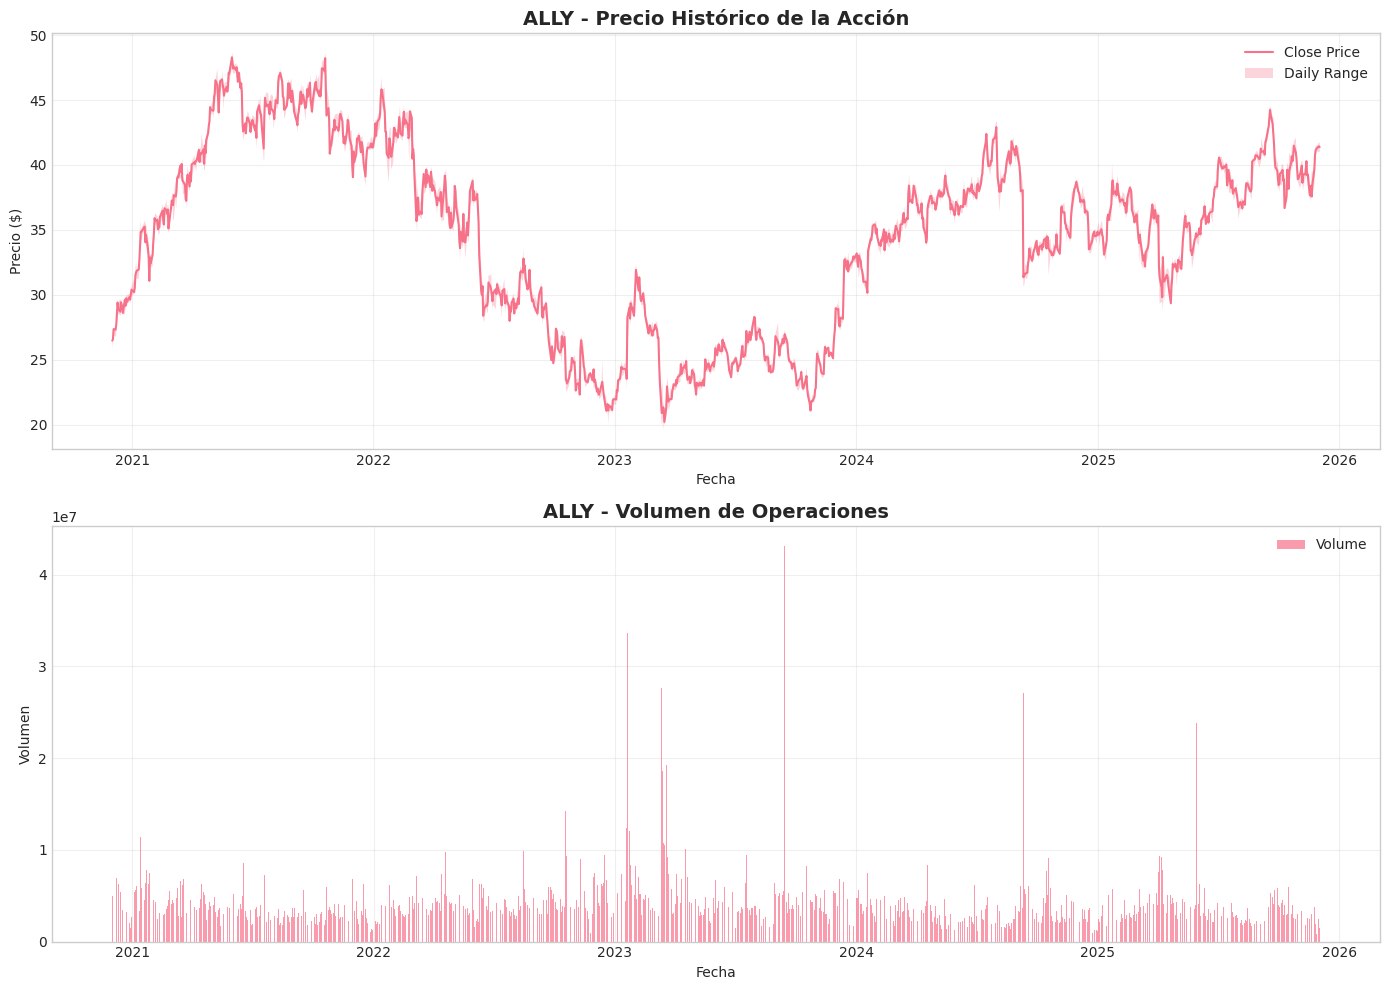

In [5]:
# Plot historical prices
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Price chart
axes[0].plot(prices.index, prices['Close'], label='Close Price', linewidth=1.5)
axes[0].fill_between(prices.index, prices['Low'], prices['High'], alpha=0.3, label='Daily Range')
axes[0].set_title('ALLY - Precio Histórico de la Acción', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Precio ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volume chart
axes[1].bar(prices.index, prices['Volume'], alpha=0.7, label='Volume')
axes[1].set_title('ALLY - Volumen de Operaciones', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Volumen')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Métodos de Valoración Tradicionales

In [6]:
# Initialize valuation engine
valuation = ValuationEngine(data_loader=loader)

### 2.1 Valoración por Valor Contable

In [7]:
book_value = valuation.book_value_valuation()
print("=" * 50)
print("ANÁLISIS DE VALOR CONTABLE")
print("=" * 50)
for key, value in book_value.items():
    if isinstance(value, float):
        if abs(value) > 1e6:
            print(f"{key}: ${value:,.0f}")
        else:
            print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

ANÁLISIS DE VALOR CONTABLE
method: Valor Contable
intrinsic_value: 45.13
current_price: 41.37
total_equity: $13,903,000,000
shares_outstanding: 308053195
price_to_book: 0.92
upside_potential: 9.09


### 2.2 Valoración por Valor Contable Ajustado

In [8]:
adj_book_value = valuation.adjusted_book_value_valuation()
print("=" * 50)
print("ANÁLISIS DE VALOR CONTABLE AJUSTADO")
print("=" * 50)
for key, value in adj_book_value.items():
    if isinstance(value, float):
        if abs(value) > 1e6:
            print(f"{key}: ${value:,.0f}")
        else:
            print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

ANÁLISIS DE VALOR CONTABLE AJUSTADO
method: Valor Contable Ajustado
intrinsic_value: 41.38
current_price: 41.37
total_equity: $13,903,000,000
intangible_assets: $1,156,000,000
adjusted_equity: $12,747,000,000
shares_outstanding: 308053195
price_to_adjusted_book: 1.00
upside_potential: 0.02


### 2.3 Valoración por Ratio P/E

In [9]:
pe_valuation = valuation.pe_ratio_valuation()
print("=" * 50)
print("ANÁLISIS P/E")
print("=" * 50)
for key, value in pe_valuation.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

ANÁLISIS P/E
method: Relación P/E
intrinsic_value: 32.49
current_price: 41.37
eps: 1.67
current_pe: 24.77
target_pe: 19.45
upside_potential: -21.48


### 2.4 Modelo de Descuento de Dividendos (DDM)

In [10]:
ddm = valuation.dividend_discount_model(
    required_return=0.10,  # 10% required return
    growth_rate=0.03,      # 3% dividend growth
    terminal_growth=0.02,  # 2% perpetual growth
    forecast_years=5,
)
print("=" * 50)
print("ANÁLISIS DEL MODELO DE DESCUENTO DE DIVIDENDOS")
print("=" * 50)
for key, value in ddm.items():
    if key == 'projected_dividends':
        print(f"\n{key}:")
        for div in value:
            print(f"  Año {div['year']}: Dividendo=${div['dividend']:.2f}, VP=${div['pv']:.2f}")
    elif isinstance(value, float):
        if abs(value) > 1e6:
            print(f"{key}: ${value:,.0f}")
        else:
            print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

ANÁLISIS DEL MODELO DE DESCUENTO DE DIVIDENDOS
method: Modelo de Descuento de Dividendos (DDM)
intrinsic_value: 15.96
current_price: 41.37
dividend_per_share: 1.20
required_return: 0.10
growth_rate_stage1: 0.03
terminal_growth_rate: 0.02
forecast_years: 5
pv_stage1_dividends: 4.95
terminal_value: 17.74
pv_terminal_value: 11.01

projected_dividends:
  Año 1: Dividendo=$1.24, VP=$1.12
  Año 2: Dividendo=$1.27, VP=$1.05
  Año 3: Dividendo=$1.31, VP=$0.99
  Año 4: Dividendo=$1.35, VP=$0.92
  Año 5: Dividendo=$1.39, VP=$0.86
upside_potential: -61.42


### 2.5 Análisis de Compañías Comparables

In [11]:
comparables = valuation.comparable_companies_valuation()
print("=" * 50)
print("ANÁLISIS DE COMPAÑÍAS COMPARABLES")
print("=" * 50)

# Display peer metrics table
if 'peer_metrics' in comparables and comparables['peer_metrics']:
    peer_df = pd.DataFrame(comparables['peer_metrics'])
    print("\nMétricas de Empresas Pares:")
    display(peer_df)

print(f"\nP/E Mediano: {comparables.get('median_pe', 'N/A')}")
print(f"P/B Mediano: {comparables.get('median_pb', 'N/A')}")
print(f"Valor Implícito (P/E): ${comparables.get('implied_value_pe', 0):.2f}")
print(f"Valor Implícito (P/B): ${comparables.get('implied_value_pb', 0):.2f}")
print(f"Valor Intrínseco Promedio: ${comparables.get('intrinsic_value', 0):.2f}")
print(f"Precio Actual: ${comparables.get('current_price', 0):.2f}")
print(f"Potencial Alcista: {comparables.get('upside_potential', 0):.2f}%")

ANÁLISIS DE COMPAÑÍAS COMPARABLES

Métricas de Empresas Pares:


,Ticker,P/E,P/B,Dividend Yield,Market Cap,ROE
0,COF,76.13,1.31,1.45,142660321280.00,0.02
1,SYF,8.62,1.79,1.54,29245583360.00,0.22
2,DFS,NaN,NaN,NaN,NaN,NaN
3,AXP,24.33,7.70,0.88,251947646976.00,0.34
4,C,14.57,0.96,2.34,191011569664.00,0.07



P/E Mediano: 19.452343
P/B Mediano: 1.5475197500000002
Valor Implícito (P/E): $32.49
Valor Implícito (P/B): $64.31
Valor Intrínseco Promedio: $48.40
Precio Actual: $41.37
Potencial Alcista: 16.99%


### 2.6 DCF (Flujo de Caja Libre)

In [12]:
dcf = valuation.dcf_fcf_valuation(
    required_return=0.10,  # 10% WACC
    growth_rate=0.05,      # 5% FCF growth
    terminal_growth=0.02,  # 2% perpetual growth
    forecast_years=5,
)
print("=" * 50)
print("ANÁLISIS DCF (FLUJO DE CAJA LIBRE)")
print("=" * 50)
for key, value in dcf.items():
    if key == 'projected_fcfs':
        print(f"\n{key}:")
        for fcf in value:
            print(f"  Año {fcf['year']}: FCF=${fcf['fcf']:,.0f}, VP=${fcf['pv']:,.0f}")
    elif isinstance(value, float):
        if abs(value) > 1e6:
            print(f"{key}: ${value:,.0f}")
        else:
            print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

ANÁLISIS DCF (FLUJO DE CAJA LIBRE)
method: DCF (Flujo de Caja Libre)
intrinsic_value: 50.14
current_price: 41.37
free_cash_flow: $1,068,000,000
wacc: 0.10
growth_rate: 0.05
terminal_growth_rate: 0.02
forecast_years: 5
pv_projected_fcfs: $4,654,473,053
terminal_value: $17,379,126,037
pv_terminal_value: $10,791,069,932
enterprise_value: $15,445,542,985
shares_outstanding: 308053195

projected_fcfs:
  Año 1: FCF=$1,121,400,000, VP=$1,019,454,545
  Año 2: FCF=$1,177,470,000, VP=$973,115,702
  Año 3: FCF=$1,236,343,500, VP=$928,883,171
  Año 4: FCF=$1,298,160,675, VP=$886,661,208
  Año 5: FCF=$1,363,068,709, VP=$846,358,426
upside_potential: 21.20


## 3. Comparación de Valoraciones

In [13]:
# Get summary of all valuations
valuation_summary = valuation.get_valuation_summary()
print("\n" + "=" * 70)
print("COMPARACIÓN DE MÉTODOS DE VALORACIÓN")
print("=" * 70)
display(valuation_summary)


COMPARACIÓN DE MÉTODOS DE VALORACIÓN

COMPARACIÓN DE MÉTODOS DE VALORACIÓN


,Method,Intrinsic Value ($),Current Price ($),Upside Potential (%),Error
0,Valor Contable,45.13,41.37,9.09,
1,Valor Contable Ajustado,41.38,41.37,0.02,
2,Relación P/E,32.49,41.37,-21.48,
3,Modelo de Descuento de Dividendos (DDM),15.96,41.37,-61.42,
4,Empresas Comparables,48.40,41.37,16.99,
5,DCF (Flujo de Caja Libre),50.14,41.37,21.20,


In [14]:
# Get weighted fair value estimate
fair_value = valuation.get_fair_value_estimate()
print("\n" + "=" * 50)
print("ESTIMACIÓN PONDERADA DE VALOR JUSTO")
print("=" * 50)
print(f"Estimación de Valor Justo: ${fair_value['fair_value_estimate']:.2f}")
print(f"Precio Actual: ${fair_value['current_price']:.2f}")
print(f"Potencial Alcista: {fair_value['upside_potential']:.2f}%")
print(f"Métodos Utilizados: {', '.join(fair_value['valid_methods_used'])}")


ESTIMACIÓN PONDERADA DE VALOR JUSTO
Estimación de Valor Justo: $37.88
Precio Actual: $41.37
Potencial Alcista: -8.42%
Métodos Utilizados: book_value, adjusted_book_value, pe_ratio, dividend_discount, comparables, dcf_fcf


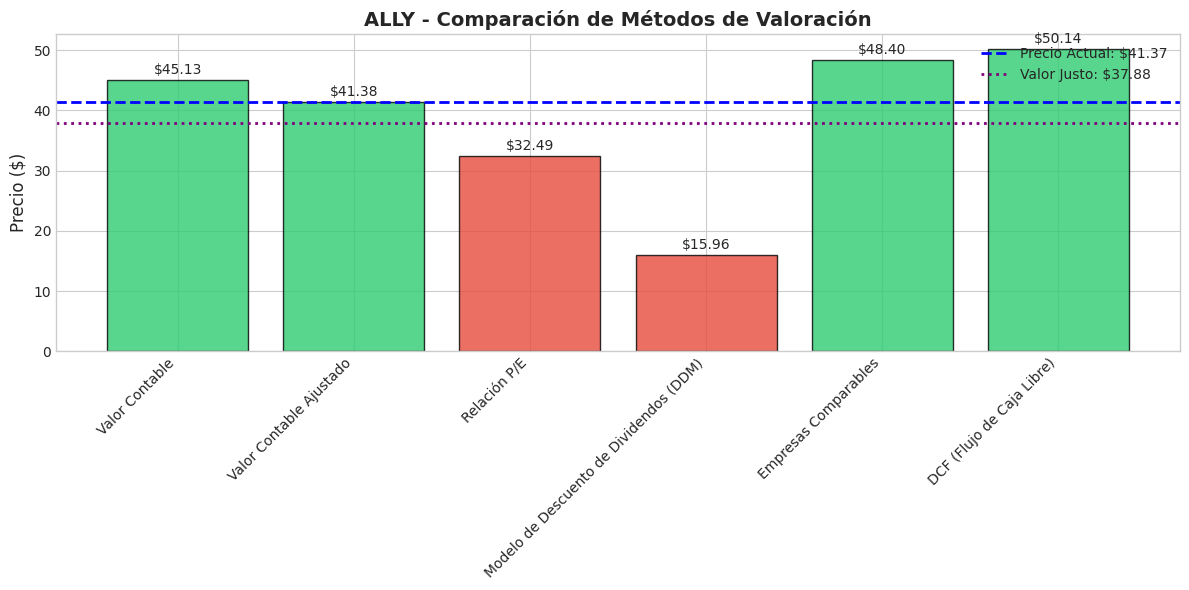

In [15]:
# Visualize valuation comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Filter out methods with zero or error values
valid_valuations = valuation_summary[valuation_summary['Intrinsic Value ($)'] > 0].copy()

methods = valid_valuations['Method']
values = valid_valuations['Intrinsic Value ($)']
current_price = valid_valuations['Current Price ($)'].iloc[0]

# Create bar chart
colors = ['#2ecc71' if v > current_price else '#e74c3c' for v in values]
bars = ax.bar(methods, values, color=colors, alpha=0.8, edgecolor='black')

# Add current price line
ax.axhline(y=current_price, color='blue', linestyle='--', linewidth=2, label=f'Precio Actual: ${current_price:.2f}')

# Add fair value line
ax.axhline(y=fair_value['fair_value_estimate'], color='purple', linestyle=':', linewidth=2, 
           label=f"Valor Justo: ${fair_value['fair_value_estimate']:.2f}")

# Customize chart
ax.set_ylabel('Precio ($)', fontsize=12)
ax.set_title('ALLY - Comparación de Métodos de Valoración', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')

# Add value labels on bars
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'${val:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Simulación Monte Carlo

In [16]:
# Initialize Monte Carlo simulator
mc = MonteCarloSimulation(
    n_simulations=10000,
    n_days=252,  # 1 year
    random_seed=42
)

# Run simulation
close_prices = prices['Close']
mc_results = mc.run_simulation(close_prices)

# Display summary statistics
mc_summary = mc.get_summary_statistics(mc_results)
print("\n" + "=" * 50)
print("RESULTADOS DE LA SIMULACIÓN MONTE CARLO")
print("=" * 50)
display(mc_summary)


RESULTADOS DE LA SIMULACIÓN MONTE CARLO


,Métrica,Valor
0,Precio inicial,$41.37
1,Precio medio final,$41.38
2,Precio mediano final,$41.36
3,Desv. estándar (final),$0.99
4,Percentil 5,$39.73
5,Percentil 25,$40.71
6,Percentil 75,$42.03
7,Percentil 95,$43.03
8,Probabilidad de ganancia (%),49.8%
9,Retorno esperado (%),0.02%


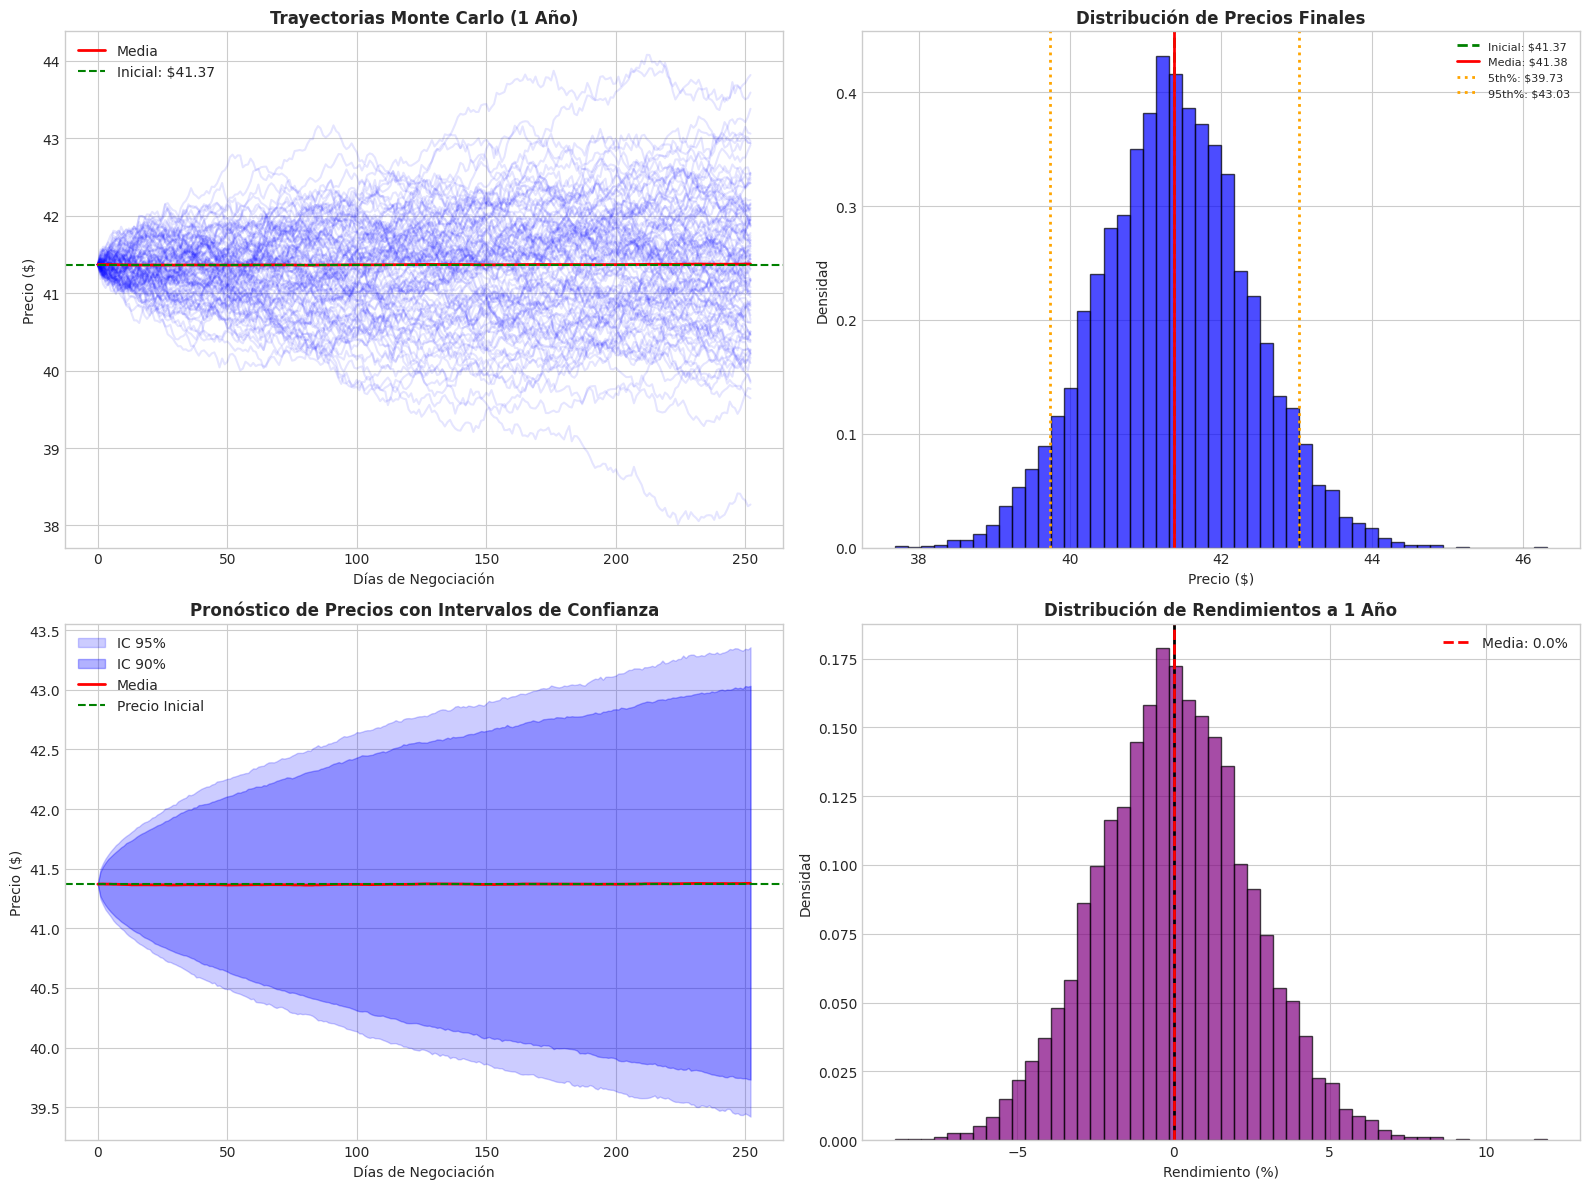

In [17]:
# Plot Monte Carlo simulation results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Sample price paths
ax1 = axes[0, 0]
n_paths_to_plot = 100
for i in range(n_paths_to_plot):
    ax1.plot(mc_results['price_paths'][i], alpha=0.1, color='blue')
ax1.plot(np.mean(mc_results['price_paths'], axis=0), color='red', linewidth=2, label='Media')
ax1.axhline(y=mc_results['initial_price'], color='green', linestyle='--', label=f"Inicial: ${mc_results['initial_price']:.2f}")
ax1.set_title('Trayectorias Monte Carlo (1 Año)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Días de Negociación')
ax1.set_ylabel('Precio ($)')
ax1.legend()

# Plot 2: Distribution of final prices
ax2 = axes[0, 1]
ax2.hist(mc_results['final_prices'], bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
ax2.axvline(x=mc_results['initial_price'], color='green', linestyle='--', linewidth=2, label=f"Inicial: ${mc_results['initial_price']:.2f}")
ax2.axvline(x=mc_results['mean_final_price'], color='red', linestyle='-', linewidth=2, label=f"Media: ${mc_results['mean_final_price']:.2f}")
ax2.axvline(x=mc_results['percentiles'][5], color='orange', linestyle=':', linewidth=2, label=f"5th%: ${mc_results['percentiles'][5]:.2f}")
ax2.axvline(x=mc_results['percentiles'][95], color='orange', linestyle=':', linewidth=2, label=f"95th%: ${mc_results['percentiles'][95]:.2f}")
ax2.set_title('Distribución de Precios Finales', fontsize=12, fontweight='bold')
ax2.set_xlabel('Precio ($)')
ax2.set_ylabel('Densidad')
ax2.legend(fontsize=8)

# Plot 3: Confidence intervals
ax3 = axes[1, 0]
intervals = mc.get_confidence_intervals(mc_results['price_paths'])
days = range(mc_results['price_paths'].shape[1])

ax3.fill_between(days, intervals['95%']['lower'], intervals['95%']['upper'], alpha=0.2, color='blue', label='IC 95%')
ax3.fill_between(days, intervals['90%']['lower'], intervals['90%']['upper'], alpha=0.3, color='blue', label='IC 90%')
ax3.plot(days, intervals['95%']['mean'], color='red', linewidth=2, label='Media')
ax3.axhline(y=mc_results['initial_price'], color='green', linestyle='--', label='Precio Inicial')
ax3.set_title('Pronóstico de Precios con Intervalos de Confianza', fontsize=12, fontweight='bold')
ax3.set_xlabel('Días de Negociación')
ax3.set_ylabel('Precio ($)')
ax3.legend()

# Plot 4: Return distribution
ax4 = axes[1, 1]
returns = (mc_results['final_prices'] - mc_results['initial_price']) / mc_results['initial_price'] * 100
ax4.hist(returns, bins=50, density=True, alpha=0.7, color='purple', edgecolor='black')
ax4.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax4.axvline(x=np.mean(returns), color='red', linestyle='--', linewidth=2, label=f"Media: {np.mean(returns):.1f}%")
ax4.set_title('Distribución de Rendimientos a 1 Año', fontsize=12, fontweight='bold')
ax4.set_xlabel('Rendimiento (%)')
ax4.set_ylabel('Densidad')
ax4.legend()

plt.tight_layout()
plt.show()

## 5. Predicción de Precio con LSTM

In [18]:
# Import LSTM model (requires TensorFlow)
try:
    from src.lstm_model import LSTMPredictor
    
    # Initialize and train LSTM model
    lstm = LSTMPredictor(
        sequence_length=60,
        units=50,
        epochs=25,  # Reduced for faster execution
        batch_size=32
    )
    
    print("Entrenando modelo LSTM...")
    training_results = lstm.train(close_prices, train_ratio=0.8, verbose=1)
    
    print(f"\nRMSE de Entrenamiento: ${training_results['train_rmse']:.2f}")
    print(f"RMSE de Prueba: ${training_results['test_rmse']:.2f}")
    
    LSTM_AVAILABLE = True
except ImportError as e:
    print(f"Modelo LSTM no disponible: {e}")
    print("Instala TensorFlow para habilitar predicciones LSTM: pip install tensorflow")
    LSTM_AVAILABLE = False

Entrenando modelo LSTM...


2025-12-02 17:48:00.432327: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-02 17:48:00.506329: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-02 17:48:03.783217: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-02 17:48:03.783217: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Epoch 1/25


2025-12-02 17:48:04.157347: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0462 - val_loss: 0.0047
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0462 - val_loss: 0.0047
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0084 - val_loss: 0.0042
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0084 - val_loss: 0.0042
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0062 - val_loss: 0.0043
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0062 - val_loss: 0.0043
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0063 - val_loss: 0.0034
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0063 - val_loss: 0.0034
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0056 - val_loss

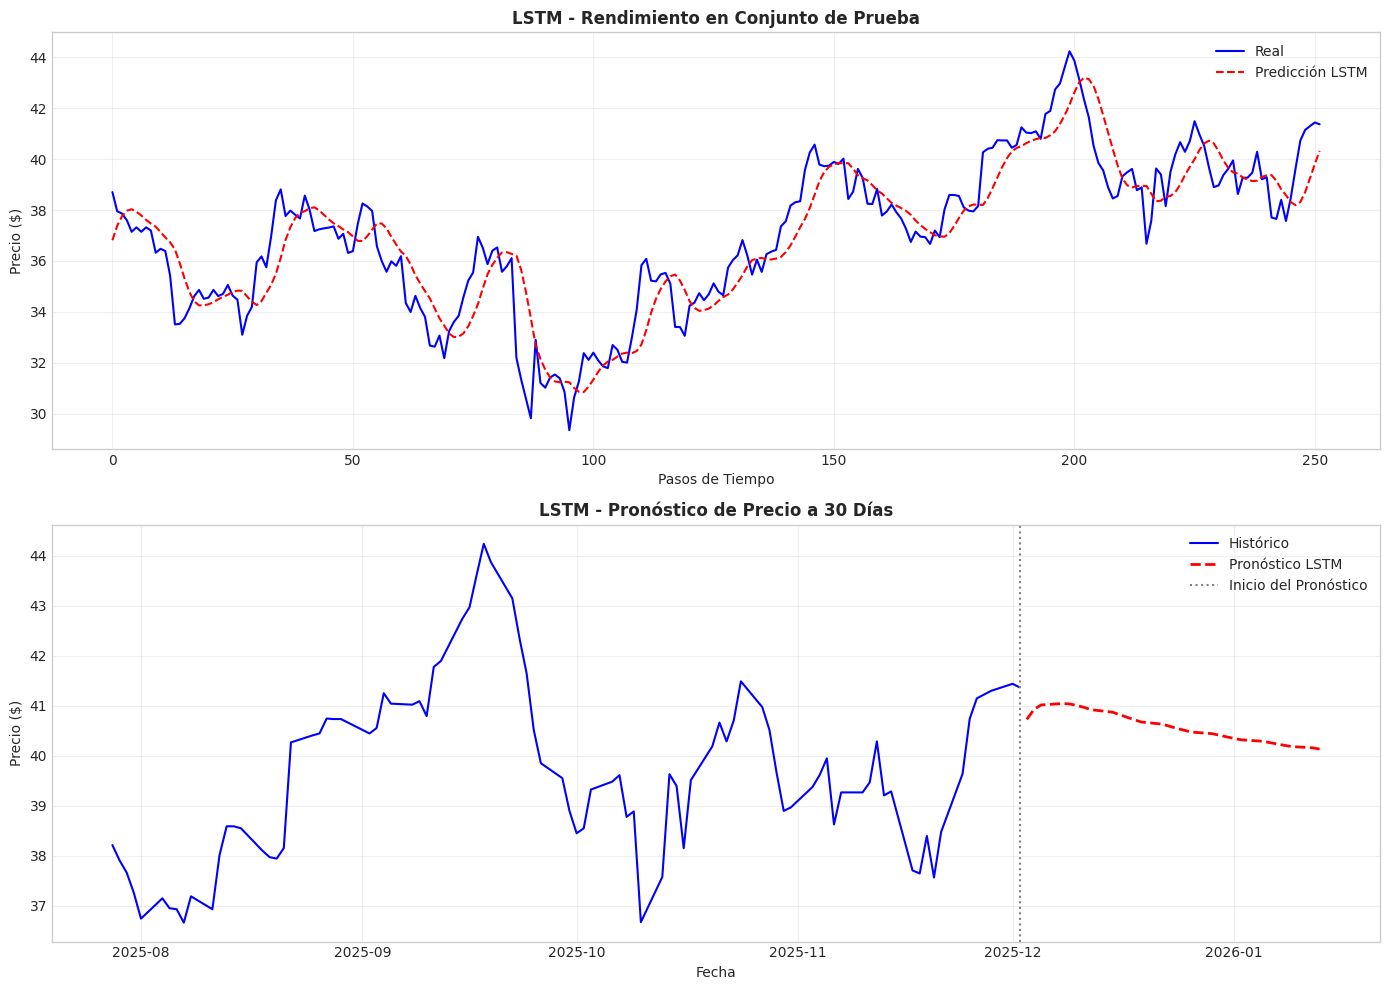


RESUMEN DE PREDICCIÓN LSTM
Precio Actual: $41.37
Precio Predicho (30 días): $40.14
Cambio Predicho: -2.98%


In [19]:
if LSTM_AVAILABLE:
    # Predict future prices
    days_ahead = 30
    future_predictions = lstm.predict_future(close_prices, days_ahead=days_ahead)
    future_dates = lstm.get_prediction_dates(close_prices.index[-1], days_ahead=days_ahead)
    
    # Plot LSTM predictions
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot 1: Training results
    ax1 = axes[0]
    ax1.plot(training_results['actual_test'], label='Real', color='blue', linewidth=1.5)
    ax1.plot(training_results['test_predictions'], label='Predicción LSTM', color='red', linestyle='--', linewidth=1.5)
    ax1.set_title('LSTM - Rendimiento en Conjunto de Prueba', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Pasos de Tiempo')
    ax1.set_ylabel('Precio ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Future predictions
    ax2 = axes[1]
    # Mostrar los últimos 90 días de datos históricos
    historical_end = close_prices.iloc[-90:]
    ax2.plot(historical_end.index, historical_end.values, label='Histórico', color='blue', linewidth=1.5)
    ax2.plot(future_dates, future_predictions, label='Pronóstico LSTM', color='red', linestyle='--', linewidth=2)
    ax2.axvline(x=close_prices.index[-1], color='gray', linestyle=':', label='Inicio del Pronóstico')
    ax2.set_title(f'LSTM - Pronóstico de Precio a {days_ahead} Días', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Fecha')
    ax2.set_ylabel('Precio ($)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print prediction summary
    print("\n" + "=" * 50)
    print("RESUMEN DE PREDICCIÓN LSTM")
    print("=" * 50)
    print(f"Precio Actual: ${close_prices.iloc[-1]:.2f}")
    print(f"Precio Predicho ({days_ahead} días): ${future_predictions[-1]:.2f}")
    print(f"Cambio Predicho: {((future_predictions[-1] - close_prices.iloc[-1]) / close_prices.iloc[-1] * 100):.2f}%")

## 6. Resumen Final y Recomendaciones

In [20]:
# Create comprehensive summary
print("\n" + "=" * 70)
print("ALLY FINANCIAL - RESUMEN COMPREHENSIVO DE VALORACIÓN")
print("=" * 70)

current_price = loader.get_current_price()
print(f"\nPrecio de Mercado Actual: ${current_price:.2f}")

print("\n--- Métodos de Valoración Tradicionales ---")
print(valuation_summary.to_string(index=False))

print(f"\n--- Estimación Ponderada de Valor Justo ---")
print(f"Estimación de Valor Justo: ${fair_value['fair_value_estimate']:.2f}")
print(f"Potencial Alcista/Descenso: {fair_value['upside_potential']:.2f}%")

print(f"\n--- Simulación Monte Carlo (1 Año) ---")
print(f"Precio Medio Predicho: ${mc_results['mean_final_price']:.2f}")
print(f"Intervalo de Confianza 95%: ${mc_results['percentiles'][5]:.2f} - ${mc_results['percentiles'][95]:.2f}")
print(f"Probabilidad de Ganancia: {mc_results['prob_profit']:.1f}%")

if LSTM_AVAILABLE:
    print(f"\n--- Predicción LSTM ({days_ahead}-Días) ---")
    print(f"Precio Predicho: ${future_predictions[-1]:.2f}")
    print(f"Cambio Predicho: {((future_predictions[-1] - current_price) / current_price * 100):.2f}%")

# Recomendación de inversión
print("\n" + "=" * 70)
print("ANÁLISIS DE INVERSIÓN")
print("=" * 70)

if fair_value['upside_potential'] > 20:
    recommendation = "COMPRA FUERTE - Significativamente infravalorado"
elif fair_value['upside_potential'] > 10:
    recommendation = "COMPRA - Moderadamente infravalorado"
elif fair_value['upside_potential'] > -10:
    recommendation = "MANTENER - Valor razonable"
elif fair_value['upside_potential'] > -20:
    recommendation = "VENDER - Moderadamente sobrevalorado"
else:
    recommendation = "VENTA FUERTE - Significativamente sobrevalorado"

print(f"\nRecomendación: {recommendation}")
print(f"\nNota: Este análisis es solo para fines educativos y no debe ser")
print(f"considerado como asesoramiento financiero. Siempre realice su propia investigación y")
print(f"consulte con un asesor financiero antes de tomar decisiones de inversión.")


ALLY FINANCIAL - RESUMEN COMPREHENSIVO DE VALORACIÓN

Precio de Mercado Actual: $41.37

--- Métodos de Valoración Tradicionales ---
                                 Method  Intrinsic Value ($)  Current Price ($)  Upside Potential (%) Error
                         Valor Contable                45.13              41.37                  9.09      
                Valor Contable Ajustado                41.38              41.37                  0.02      
                           Relación P/E                32.49              41.37                -21.48      
Modelo de Descuento de Dividendos (DDM)                15.96              41.37                -61.42      
                   Empresas Comparables                48.40              41.37                 16.99      
              DCF (Flujo de Caja Libre)                50.14              41.37                 21.20      

--- Estimación Ponderada de Valor Justo ---
Estimación de Valor Justo: $37.88
Potencial Alcista/Descenso: -8.4

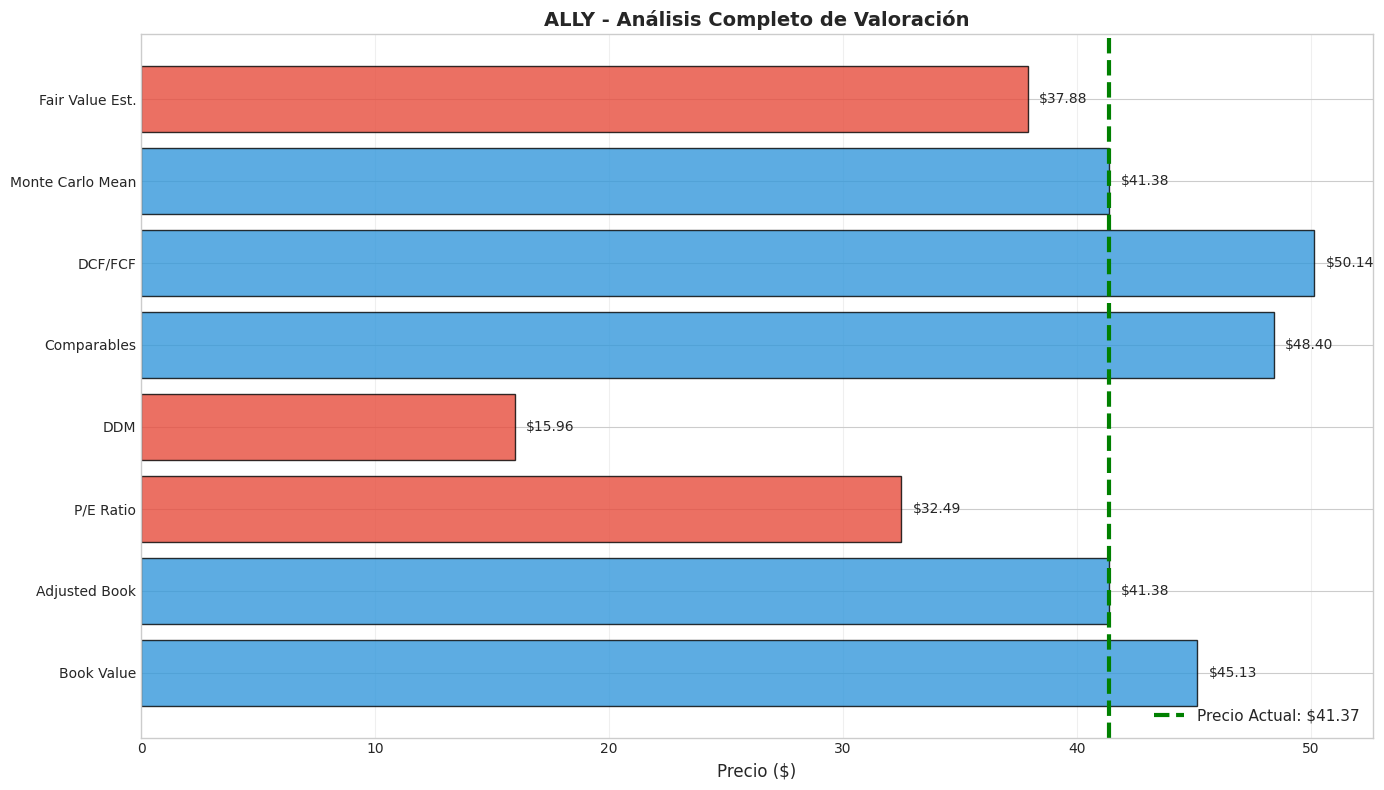

In [21]:
# Final visualization: All methods comparison
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data
methods_data = {
    'Book Value': book_value.get('intrinsic_value', 0),
    'Adjusted Book': adj_book_value.get('intrinsic_value', 0),
    'P/E Ratio': pe_valuation.get('intrinsic_value', 0),
    'DDM': ddm.get('intrinsic_value', 0),
    'Comparables': comparables.get('intrinsic_value', 0),
    'DCF/FCF': dcf.get('intrinsic_value', 0),
    'Monte Carlo Mean': mc_results['mean_final_price'],
    'Fair Value Est.': fair_value['fair_value_estimate']
}

# Filter out zero values
methods_data = {k: v for k, v in methods_data.items() if v > 0}

methods = list(methods_data.keys())
values = list(methods_data.values())

# Create bar chart
colors = ['#3498db' if v > current_price else '#e74c3c' for v in values]
bars = ax.barh(methods, values, color=colors, alpha=0.8, edgecolor='black')

# Add current price line
ax.axvline(x=current_price, color='green', linestyle='--', linewidth=3, 
           label=f'Precio Actual: ${current_price:.2f}')

# Add value labels
for bar, val in zip(bars, values):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, 
            f'${val:.2f}', va='center', fontsize=10)

ax.set_xlabel('Precio ($)', fontsize=12)
ax.set_title('ALLY - Análisis Completo de Valoración', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=11)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()